<a href="https://colab.research.google.com/github/joygeo007/MachineKnight_hackathon/blob/main/Copy_of_Machineknight_Hackathon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Activation, Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint
from tensorflow.keras.optimizers import Adam, SGD
%matplotlib inline

In [5]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [6]:
train.head()

,id,type,locality,activation_date,latitude,longitude,lease_type,gym,lift,swimming_pool,...,bathroom,facing,cup_board,floor,total_floor,amenities,water_supply,building_type,balconies,rent
0,ff8081815733a243015733b2876600a6,BHK2,"Cauvery Colony,Koramangala",21-04-2018 14:44,12.934471,77.634471,FAMILY,1,1,1,...,2,E,2,6,12,"{""LIFT"":true,""GYM"":true,""INTERNET"":true,""AC"":f...",CORP_BORE,AP,2,40000
1,ff8081815ee25e15015ee50004da2acd,BHK2,Bellandur,09-10-2017 12:48,12.929557,77.672280,ANYONE,0,1,0,...,2,NE,2,3,4,"{""LIFT"":true,""GYM"":false,""INTERNET"":false,""AC""...",CORPORATION,AP,2,22000
2,ff80818163f29c9e0163f46770b873e7,BHK3,Thiruvanmiyur,12-06-2018 22:02,12.982870,80.262012,FAMILY,0,1,0,...,3,E,3,1,5,"{""LIFT"":true,""GYM"":false,""INTERNET"":false,""AC""...",CORP_BORE,AP,3,28000
3,ff80818164b68a700164b74b1b247a1d,BHK1,Attiguppe,20-07-2018 16:22,12.955991,77.531634,FAMILY,0,0,0,...,1,E,1,1,2,"{""LIFT"":false,""GYM"":false,""INTERNET"":false,""AC...",CORPORATION,IH,0,8000
4,ff80818163b1faf00163b4b9b8a163b1,BHK3,Kodihalli,31-05-2018 17:41,12.963903,77.649446,FAMILY,0,0,0,...,3,E,4,0,0,"{""LIFT"":false,""GYM"":false,""INTERNET"":false,""AC...",CORPORATION,IH,1,45000


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20500 entries, 0 to 20499
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               20500 non-null  object 
 1   type             20500 non-null  object 
 2   locality         20500 non-null  object 
 3   activation_date  20500 non-null  object 
 4   latitude         20500 non-null  float64
 5   longitude        20500 non-null  float64
 6   lease_type       20500 non-null  object 
 7   gym              20500 non-null  int64  
 8   lift             20500 non-null  int64  
 9   swimming_pool    20500 non-null  int64  
 10  negotiable       20500 non-null  int64  
 11  furnishing       20500 non-null  object 
 12  parking          20500 non-null  object 
 13  property_size    20500 non-null  int64  
 14  property_age     20500 non-null  int64  
 15  bathroom         20500 non-null  int64  
 16  facing           20500 non-null  object 
 17  cup_board   

In [8]:
fig = px.scatter_mapbox(
    train,  # Our DataFrame
    lat="latitude",
    lon="longitude",
    center={"lat": 12.97, "lon": 77.5867},  # Map will be centered on Mexico City
    width=600,  # Width of map
    height=600,  # Height of map
    hover_data=["rent"],  # Display price when hovering mouse over house
)

fig.update_layout(mapbox_style="open-street-map")

fig.show()

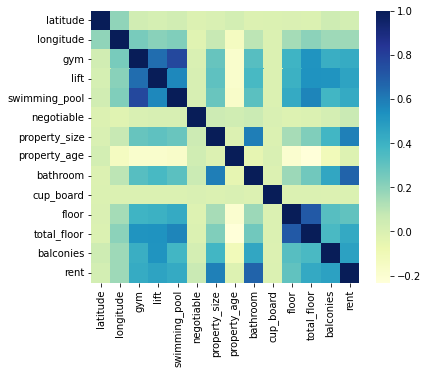

In [9]:
#Checking corelation of columns
plt.figure(figsize=(6,5))
data = train.drop(['id','activation_date','amenities'],axis=1)
sb.heatmap(data.corr(), cmap="YlGnBu")
plt.show()

In [10]:
#checking for duplicate values
train.id.duplicated().sum()     #no duplicate values

0

In [11]:
#dropping columns with high cardinality and target variable
df = train.drop(['id','activation_date','amenities','rent','locality'],axis=1)
df.head().T

,0,1,2,3,4
type,BHK2,BHK2,BHK3,BHK1,BHK3
latitude,12.934471,12.929557,12.98287,12.955991,12.963903
longitude,77.634471,77.67228,80.262012,77.531634,77.649446
lease_type,FAMILY,ANYONE,FAMILY,FAMILY,FAMILY
gym,1,0,0,0,0
lift,1,1,1,0,0
swimming_pool,1,0,0,0,0
negotiable,0,1,0,1,1
furnishing,SEMI_FURNISHED,SEMI_FURNISHED,SEMI_FURNISHED,SEMI_FURNISHED,SEMI_FURNISHED
parking,BOTH,BOTH,BOTH,TWO_WHEELER,BOTH


In [12]:
#checking for null values
display(df.isna().sum()) #no null values


type             0
latitude         0
longitude        0
lease_type       0
gym              0
lift             0
swimming_pool    0
negotiable       0
furnishing       0
parking          0
property_size    0
property_age     0
bathroom         0
facing           0
cup_board        0
floor            0
total_floor      0
water_supply     0
building_type    0
balconies        0
dtype: int64

In [13]:
#getting categorical values
catcol = list(df.select_dtypes(include=['object']).columns)
print("Categorical values are : " + ", ".join(list(catcol)) )

#label encoding some of the categorical columns

X = pd.concat([df['type'].map({'RK1':0,'BHK1':1,'BHK2':2,'BHK3':3,'BHK4':4,'BHK4PLUS':5}).astype(int),
                df['furnishing'].map({'NOT_FURNISHED':0,'SEMI_FURNISHED':1, 'FULLY_FURNISHED':2}).astype(int)]
           ,axis=1)

#One hot encoding rest of the categorical columns

catcol.remove('type')
catcol.remove('furnishing')


Categorical values are : type, lease_type, furnishing, parking, facing, water_supply, building_type


In [14]:
temp = []
for cat in catcol:
  temp.append(pd.get_dummies(df[cat]))

X = pd.concat([X] + temp + [df.select_dtypes(include=['int64','float64'])],axis=1 )
y = train['rent']

In [15]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [16]:
x_train,x_test,y_train,y_test, = train_test_split(X,y,test_size=0.2,random_state=42)

Random Forest Classifier I

In [17]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
rf = RandomForestRegressor(random_state=42)
rf.fit(x_train,y_train)
print("Train RMSE :",mean_squared_error(y_train,rf.predict(x_train),squared=False))
print("Test RMSE :",mean_squared_error(y_test,rf.predict(x_test),squared=False))
print(rf.score(x_test, y_test))
print(rf.score(x_train, y_train))

Train RMSE : 1378.906305726246
Test RMSE : 3756.3098404418065
0.7961464742724889
0.9734439976073581


In [18]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(random_state=42) 
dt.fit(x_train,y_train)
y_pred = dt.predict(x_train)
print("Train RMSE :",mean_squared_error(y_train,dt.predict(x_train),squared=False))
print("Test RMSE :",mean_squared_error(y_test,dt.predict(x_test),squared=False))
print(dt.score(x_test, y_test))
print(dt.score(x_train, y_train))

Train RMSE : 0.0
Test RMSE : 5103.724054538808
0.6236691846127604
1.0
